#NVA Trace Capture and Analysis.

This file contains code to import s parameter measurements from the Fieldfox.

In [56]:
import sys
sys.path.append("/Users/benno/Dropbox/Hardware/agilentNVA/")
sys.path.append("C:/Users/bm1u11/Dropbox/Hardware/agilentNVA/")
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fieldfox as ff

tempStrings = ["RT", "_238K", "_180K", "_115K", "_7K", "_3p5K", "_2K"]
temps = [290, 238, 180, 115, 7, 3.5, 2]

fox = ff.fieldfox()

dataDict = {290 : [], 238 : [], 180 : [], 115 : [], 7 : [], 3.5 : [], 2 : []}


for (i, tempString) in enumerate(tempStrings):
    temp = temps[i]
    name = "20151120" + tempString + ".sta"

    fox.loadSTA(name)
    #fox.barrier()
    
    time.sleep(30)
    
    f = fox.getFrequencyAxis()
    g = fox.getComplexTrace()
    
    print "g[100]: ", g[100]
    
    dataDict[temp] = [f, g]


ID:  Agilent Technologies,N9913A,MY52401176,A.06.08,2012-11-15.09:59
g[100]:  (0.8946896492-0.059046572j)
g[100]:  (0.8916122263-0.0330980758j)
g[100]:  (0.8780592887+0.0316677741j)
g[100]:  (0.8751115692+0.050191323j)
g[100]:  (0.8869796645+0.1138859431j)
g[100]:  (0.8900723117+0.0985488674j)
g[100]:  (0.901509132+0.1208426168j)


key:  2
key:  3.5
key:  7
key:  115
key:  180
key:  238
key:  290
g[m] (0.511652203-0.7448512774j)
g[m] (0.2790405258-0.8234790799j)
g[m] (0.3208487709-0.8123393748j)
g[m] (0.1015296894-0.7003703903j)
g[m] (0.0278358127-0.6476928607j)
g[m] (-0.2744948345-0.3062489553j)
g[m] (-0.2091302998-0.0078780017j)


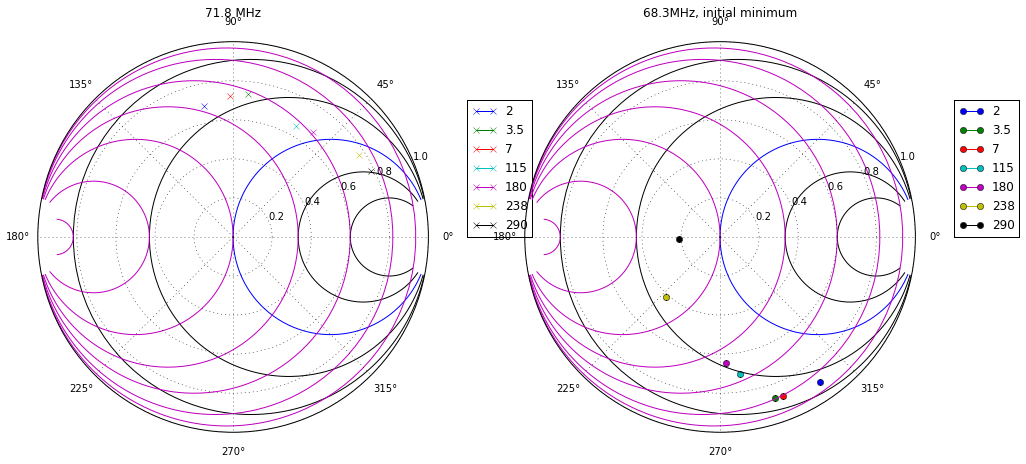

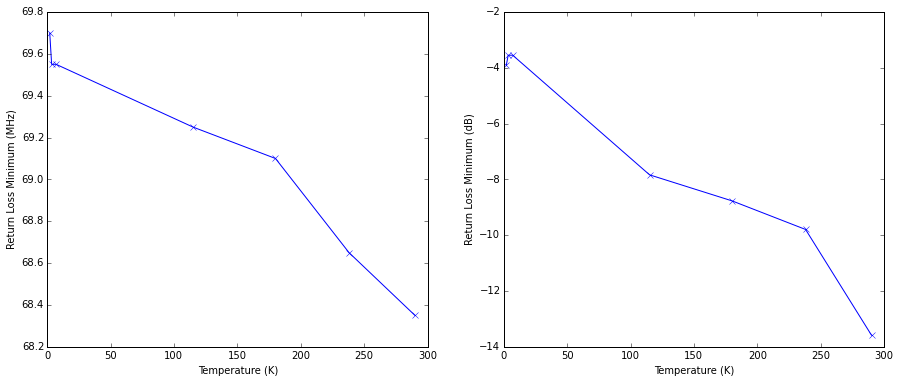

In [78]:
import pickle

output = open('allTraces.pkl', 'wb')

pickle.dump(dataDict, output)

plt.figure(figsize= (16,7))
axes = plt.subplot(121, polar= True)

for k in sorted(dataDict.keys()):
    print "key: ", k
    f, g = dataDict[k]
    t = np.argmin(np.abs(f - 70000000))
    m = np.argmin(np.abs(f - 68300000))
    #print "i: ", i
    #print "g[m]", g[m]
    plt.polar(np.angle(g[t]), abs(g[t]), "-x")
    #plt.polar(np.angle(g[m]), np.abs(g[m]), "-o")

plt.title("71.8 MHz")
plt.legend(sorted(dataDict.keys()), loc = (1.1,0.5))
addConstantResistance(plt)
addConstantConductance(plt)

axes = plt.subplot(122, polar = True)

for k in sorted(dataDict.keys()):
    #print "key: ", k
    f, g = dataDict[k]
    t = np.argmin(np.abs(f - 71800000))
    m = np.argmin(np.abs(f - 68300000))
    #print "i: ", i
    print "g[m]", g[m]
    #plt.polar(np.angle(g[t]), abs(g[t]), "-x")
    plt.polar(np.angle(g[m]), np.abs(g[m]), "-o")

plt.title("68.3MHz, initial minimum")
plt.legend(sorted(dataDict.keys()), loc = (1.1,0.5))
addConstantResistance(plt)
addConstantConductance(plt)

plt.savefig("matchingVsTemperature20151120.pdf")

temp = []
res = []
retLossMin = []

for k in sorted(dataDict.keys()):
    f,g = dataDict[k]
    returnLoss = gammaToReturnLoss(g)
    resFreq = f[np.argmin(returnLoss)]
    
    retLossMin.append(np.min(returnLoss))
    temp.append(k)
    res.append(resFreq)
    
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.plot(temp, np.array(res)/1e6, "-bx")
plt.xlabel("Temperature (K)")
plt.ylabel("Return Loss Minimum (MHz)")
plt.subplot(122)
plt.plot(temp, retLossMin, "-bx")
plt.xlabel("Temperature (K)")
plt.ylabel("Return Loss Minimum (dB)")
plt.savefig("returnLoss20151120.pdf")
    

In [4]:
wC = 2*pi*71.779e6
wH = 2*pi*285.4e6

print "Reactance Carbon from {0} to {1} Ohm".format(1./(wC*1.5e-12), 1./(wC*45e-12))
print "Reactance Hydrogen from {0} to {1} Ohm".format(1./(wH*1.5e-12), 1./(wH*45e-12))
print "Ratio wC/wH: {0}".format(wC/wH)

print "Reactance coil : {0} Ohm".format(wH*60e-9)

#To bring the values down (especially for Carbon) one needs to add capacitance!

Reactance Carbon from 1478.1941152 to 49.2731371732 Ohm
Reactance Hydrogen from 371.770481411 to 12.3923493804 Ohm
Ratio wC/wH: 0.251503153469
Reactance coil : 107.5932652 Ohm


Coil dimensions: Milled to -1 with 2 mm cutter on 16.2 mm diameter PTFE. X from 0 to 18.5 => h = 18.5, d = 15 mm
Coil measured with NVA after calibration, ground leg soldered to cavity support with cavity mounted:

The inductance of the coil is 65 nH
The reactance at 13C res frequency hence is  29.3150492807
The resistance is 0.5 Ohm (measured)


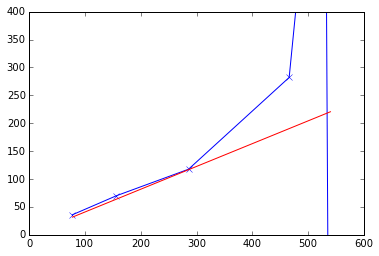

In [5]:
f = array([77.5, 156.4, 285.6, 466, 530, 540])*1e6
realZ = array([0.4, 0.8, 2, 15.8, 1400, 1100])
imagZ = array([35.9, 70, 117.5, 282, 930, -850])

plt.plot(f/1e6, imagZ, "-x")
plt.plot(f/1e6, 2*pi*f*65e-9, "-r")
plt.ylim([0, 400])

print "The inductance of the coil is 65 nH"
print "The reactance at 13C res frequency hence is ", wC*65e-9
print "The resistance is 0.5 Ohm (measured)"

plt.polar()

Gamma coil: [-0.58442052+0.79188256j -0.58023479+0.7950068j  -0.57604378+0.79810073j
 -0.57184775+0.80116444j -0.56764696+0.804198j   -0.56344166+0.8072015j
 -0.55923211+0.81017502j -0.55501855+0.81311867j -0.55080124+0.81603251j
 -0.54658041+0.81891666j -0.54235632+0.8217712j  -0.53812921+0.82459624j
 -0.53389931+0.82739186j -0.52966685+0.83015817j -0.52543209+0.83289528j
 -0.52119523+0.83560329j -0.51695653+0.8382823j  -0.51271619+0.84093242j
 -0.50847446+0.84355376j -0.50423154+0.84614644j -0.49998766+0.84871056j
 -0.49574304+0.85124624j -0.49149790+0.8537536j  -0.48725244+0.85623275j
 -0.48300687+0.85868381j -0.47876141+0.86110691j -0.47451627+0.86350216j
 -0.47027163+0.86586968j -0.46602771+0.86820961j -0.46178470+0.87052206j
 -0.45754280+0.87280717j -0.45330221+0.87506505j -0.44906311+0.87729585j
 -0.44482569+0.87949968j -0.44059015+0.88167669j -0.43635666+0.88382699j
 -0.43212541+0.88595074j -0.42789658+0.88804805j -0.42367034+0.89011907j
 -0.41944687+0.89216392j -0.41522634+0.8

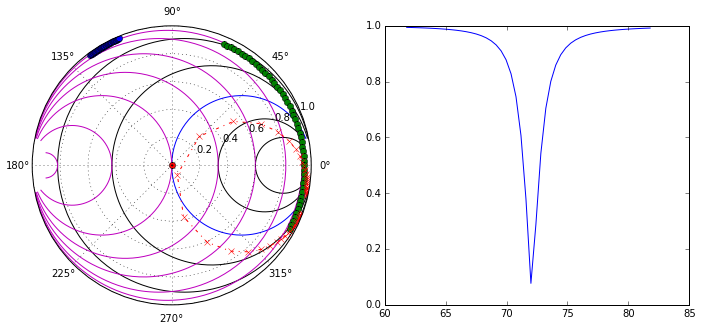

In [69]:
def impedanceToGamma(impedance, Z0 = 50):
    return (impedance - Z0)/(impedance + Z0)

def gammaToReturnLoss(gamma):
    return 20*np.log10(np.abs(gamma))

def addConstantResistance(plot, Z0 = 50, colour="-k"):
    for r in [5,20,50,100,200]:
        Z = r*ones(500) + 1j*linspace(-500,500, num=500)
        gamma = impedanceToGamma(Z)
        if r == 50:
            plt.plot(angle(gamma), abs(gamma), "-b")
        else:
            plt.plot(angle(gamma), abs(gamma), colour)
        
def addConstantReactance(plot, Z0 = 50, colour="-r"):
    for XL in [-200,-100,-50,-20,5,0,5,20,50,100,200]:
        Z = linspace(0.1,500, num=500) + 1j*XL*ones(500)
        gamma = impedanceToGamma(Z)
        plt.plot(angle(gamma), abs(gamma), colour)
        
def addConstantConductance(plot, Z0 = 50, colour = "-m"):
    for g in [1./1500, 1./500, 1./200, 1./100, 1./50, 1./20, 1./5]:
        B = linspace(-1./5,1./5, num = 500)
        Y = g + 1j*B
        gamma = impedanceToGamma(1/Y)
        plt.plot(angle(gamma), abs(gamma), colour)

def addMatchingAndTuningRange(plot, nuc="13C", colour="b.", Xmin = 50):
    if nuc == "13C":
        Xmax = 500
        Xmin = Xmin
    
    reactanceRange = linspace(Xmin, Xmax)
    
    print reactanceRange
    Z0 = 50
    
    Zlist = []
    for Xm in reactanceRange:
        for Xt in reactanceRange:
            Z = Z0 + 1j*Xm
            Z = Z*(1j)*Xt/(Z + (1j)*Xt)
            Zlist.append(Z)
    
    Zlist = array(Zlist)
    print Zlist
    gammaList = (Zlist - Z0)/(Zlist + Z0)
    print gammaList
    plt.plot(angle(gammaList), abs(gammaList), colour)
        

        
fig = plt.figure(figsize=(12,5), facecolor='white')
axes = plt.subplot(121, polar=True, axisbg='white')
#axes.spines['polar'].set_visible(False)
#plt.yticks([])
#plt.xticks([])


addConstantResistance(plt)
#addConstantReactance(plt, colour = "-gray")
addConstantConductance(plt)


#addMatchingAndTuningRange(plt, Xmin=5, colour="b.")
#addMatchingAndTuningRange(plt, Xmin=50, colour="r.")

plt.xlim([0,1])
#plt.grid(False)
#plt.polar?

f = 71.8e6
f = linspace(61.8e6, 81.8e6)
omega = 2*pi*f


Z0 = 50
L = 65e-9
# coil
coilImpedance = 0.5+1j*omega*L
gamma_coil = impedanceToGamma(coilImpedance)
print "Gamma coil:", gamma_coil
plt.plot(angle(gamma_coil), abs(gamma_coil), "o")
plt.plot(0, 0, "ro")

#now add Shunt Capacitor
CT = 68e-12# + 15.2e-12
ZCT = -1j/(omega*CT)
Z = coilImpedance*ZCT/(coilImpedance+ZCT)
print "Z after Shunt Capacitance", Z
gamma_shunt = impedanceToGamma(Z)
print "Gamma: ", gamma_shunt
plt.plot(angle(gamma_shunt), abs(gamma_shunt), "o")

#now add Matching Capacitor
CM = 7.2e-12
ZCM = -1j/(omega*CM)
Z = Z + ZCM
print "Z after Series Capacitance", Z
gamma_series = impedanceToGamma(Z)
print "Gamma: ", gamma_series
plt.plot(angle(gamma_series), abs(gamma_series), "-.x")

print "Resonance Frequency:", 1/sqrt(L*CT)/(2*pi)/1e6

plt.subplot(122)

plt.plot(f/1e6, abs(gamma_series))


In [28]:
print "Coil: ", abs(gamma_coil)
print "Gamma Matched and Tuned: ", impedanceToGamma(42 + 1j*90)
print "Matched and Tuned: ", abs(impedanceToGamma(42+1j*90))
print "Matched and Tuned: ", abs(impedanceToGamma(10-1j*120))

Coil:  0.985222638279
Gamma Matched and Tuned:  (0.444578604202+0.543347017629j)
Matched and Tuned:  0.70205136342
Matched and Tuned:  0.942809041582


In [30]:
def powerEfficiency(alpha,L,Gamma):
    """Power Efficiency as given by Kodibagkar, Conradi"""
    return exp(2*alpha*L)*(1 - abs(Gamma)**2)/(exp(4*alpha*L) - abs(Gamma)**2)

In [31]:
powerEfficiency(0.1, 1, 0.95)

0.20207327029946784

In [94]:
cableLength = 1.46 # cable length in m
#cable Type: AN50085, 45dB / 100m => 1m = 0.45 dB
10**(-0.045)

0.9015711376059569